In [1]:
import json
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilenames

F:/00UNET/4-76.json


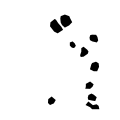

In [2]:
root1 = Tk()
files = askopenfilenames(parent =root1, title = 'Please select the Labelme generated json files')

for filename in files:
    print(filename)
    json_file_path = filename
    with open(json_file_path,'r') as f:
        #print(f)
        data = json.load(f)


    #To make a figure without the frame :
    fig = plt.figure(frameon=False)
    fig.set_size_inches(1,1)

    # To make the content fill the whole figure
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    annotations = data['shapes']

    # Plot the polygon
    for annotation in annotations:
        points = annotation['points']   #data['shapes'][i]['points']
        x,y = zip(*points)
        plt.fill(x,y,'k')

        plt.xlim([0,128])
        plt.ylim([0,128])


    # Flip the plot horizontally and vertically

    plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
    #plt.show()
    #plt.savefig(json_path[:-5] + '_mask.png',dpi=128)

    plt.savefig(json_file_path[:-4]+'_mask.png', dpi=128)

In [3]:
# Show the plot
from PIL import Image
root1 = Tk()
files = askopenfilenames(parent =root1, title = 'Please select the unthresholded mask image')

for filename in files:
    print(filename)
    mask_file_path = filename
    # Open the image
    im = Image.open(mask_file_path)
    # Convert the image to grayscale
    im = im.convert('L')
    # Threshold the image to obtain a binary image
    threshold = 128
    im = im.point(lambda p: p > threshold and 255)
    # Save the binary image
    im.save(mask_file_path, bbox_inches='tight', pad_inches=0)






F:/00UNET/4-76._mask.png
